In [3]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from astropy.io import fits
import pandas as pd

In [8]:
print(os.getcwd())  
file_path = './data/open_exoplanet_catalogue.txt'
print(os.path.exists(file_path),sep='\t') 

/drive/notebooks/PIANETI_STELLE_ETC
True


In [9]:
# Leggi le prime righe per diagnosticare il problema
with open(file_path, 'r') as f:
    for _ in range(5):  # Mostra le prime 5 righe
        print(f.readline())

# Prova a leggere il file come un DataFrame
try:
    df = pd.read_csv(file_path, sep='\t', on_bad_lines='skip', encoding='utf-8')
    print(df)
except pd.errors.ParserError as e:
    print(f"Errore durante il parsing: {e}")

name	binaryflag	mass	radius	period	semimajoraxis	eccentricity	periastron	longitude	ascendingnode	inclination	temperature	age	discoverymethod	discoveryyear	lastupdate	system_rightascension	system_declination	system_distance	hoststar_mass	hoststar_radius	hoststar_metallicity	hoststar_temperature	hoststar_age	list

Kepler-1032 b	0		0.167	3.290117950									transit	2016	16/05/10	19 19 43.4040	+40 05 51.8400	683.854	0.77	0.71	0.16	4647.0		Confirmed planets

HD 154857 b	0	2.24		408.6	1.291	0.46	57				336.0		RV	2004	14/01/25	17 11 15.7217	-56 40 50.8706	64.2	1.718	2.31	-0.31	5508		Confirmed planets

HD 154857 c	0	2.58		3452	5.36	0.06	352						RV	2014	14/01/25	17 11 15.7217	-56 40 50.8706	64.2	1.718	2.31	-0.31	5508		Confirmed planets

Kepler-994 b	0		0.143	1.151166510									transit	2016	16/05/10	19 16 17.3254	+47 24 25.3965	189.186	0.56	0.54	-0.13	3934.0		Confirmed planets

                      name  binaryflag  mass  radius       period  \
0            Kepler-1032 b           0   NaN   0.

In [10]:
df

,name,binaryflag,mass,radius,period,semimajoraxis,eccentricity,periastron,longitude,ascendingnode,...,lastupdate,system_rightascension,system_declination,system_distance,hoststar_mass,hoststar_radius,hoststar_metallicity,hoststar_temperature,hoststar_age,list
0,Kepler-1032 b,0,NaN,0.167,3.290118,NaN,NaN,NaN,NaN,NaN,...,16/05/10,19 19 43.4040,+40 05 51.8400,683.854,0.770,0.71,0.16,4647.00,NaN,Confirmed planets
1,HD 154857 b,0,2.24,NaN,408.600000,1.291,0.46,57.0,NaN,NaN,...,14/01/25,17 11 15.7217,-56 40 50.8706,64.200,1.718,2.31,-0.31,5508.00,NaN,Confirmed planets
2,HD 154857 c,0,2.58,NaN,3452.000000,5.360,0.06,352.0,NaN,NaN,...,14/01/25,17 11 15.7217,-56 40 50.8706,64.200,1.718,2.31,-0.31,5508.00,NaN,Confirmed planets
3,Kepler-994 b,0,NaN,0.143,1.151167,NaN,NaN,NaN,NaN,NaN,...,16/05/10,19 16 17.3254,+47 24 25.3965,189.186,0.560,0.54,-0.13,3934.00,NaN,Confirmed planets
4,Kepler-1350 b,0,NaN,0.225,4.496860,NaN,NaN,NaN,NaN,NaN,...,16/05/10,19 13 00.1410,+46 40 46.5233,343.926,0.550,0.53,-0.06,3827.00,NaN,Confirmed planets
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5409,HD 7449 b,2,1.09,NaN,1270.500000,2.330,0.80,-25.2,NaN,NaN,...,16/02/04,01 14 29.32198,-05 02 50.5942,38.900,1.050,1.01,-0.11,6024.00,2.1,"Confirmed planets, Planets in binary systems, ..."
5410,HD 7449 c,2,2.00,NaN,4046.000000,4.960,0.53,11.0,NaN,NaN,...,16/02/04,01 14 29.32198,-05 02 50.5942,38.900,1.050,1.01,-0.11,6024.00,2.1,"Controversial, Planets in binary systems, S-type"
5411,KMT-2021-BLG-0119L b,0,5.52,1.140,NaN,2.920,NaN,NaN,NaN,NaN,...,23/01/12,18 16 00,-29 44 38,3130.000,0.560,NaN,NaN,NaN,NaN,Confirmed planets
5412,Kepler-1174 b,0,NaN,0.142,6.892252,NaN,NaN,NaN,NaN,NaN,...,16/05/10,18 47 19.5469,+42 17 56.0200,1468.430,1.040,1.04,-0.04,5936.00,NaN,Confirmed planets


In [12]:
# Visualizza i nomi delle colonne
print("Colonne del DataFrame:")
print(df.columns)
print("------------------------------------------------------------------")
# Riepilogo del DataFrame
print("\nInformazioni sul DataFrame:")
df.info()
print("------------------------------------------------------------------")
# Statistiche descrittive
print("\nStatistiche descrittive:")
print(df.describe())
print("------------------------------------------------------------------")
# Prime righe del DataFrame
print("\nPrime righe del DataFrame:")
print(df.head())
print("------------------------------------------------------------------")

Colonne del DataFrame:
Index(['name', 'binaryflag', 'mass', 'radius', 'period', 'semimajoraxis',
       'eccentricity', 'periastron', 'longitude', 'ascendingnode',
       'inclination', 'temperature', 'age', 'discoverymethod', 'discoveryyear',
       'lastupdate', 'system_rightascension', 'system_declination',
       'system_distance', 'hoststar_mass', 'hoststar_radius',
       'hoststar_metallicity', 'hoststar_temperature', 'hoststar_age', 'list'],
      dtype='object')
------------------------------------------------------------------

Informazioni sul DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5414 entries, 0 to 5413
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   name                   5414 non-null   object 
 1   binaryflag             5414 non-null   int64  
 2   mass                   2777 non-null   float64
 3   radius                 4166 non-null   float64
 4   peri

In [20]:
df.head(1)

,name,binaryflag,mass,radius,period,semimajoraxis,eccentricity,periastron,longitude,ascendingnode,...,lastupdate,system_rightascension,system_declination,system_distance,hoststar_mass,hoststar_radius,hoststar_metallicity,hoststar_temperature,hoststar_age,list
0,Kepler-1032 b,0,NaN,0.167,3.290118,NaN,NaN,NaN,NaN,NaN,...,16/05/10,19 19 43.4040,+40 05 51.8400,683.854,0.77,0.71,0.16,4647.0,NaN,Confirmed planets


In [24]:
# Seleziona solo le colonne desiderate
df_cleaned = df[['name','hoststar_temperature', 'list']]

# Filtra il DataFrame per mantenere solo le righe con 'list' uguale a 'Confirmed planets'
df_new = df_cleaned[df_cleaned['list'] == 'Confirmed planets']
df_new = df_cleaned[df_cleaned['hoststar_temperature'].notna()]

# Visualizza il nuovo DataFrame
print(df_new)

                 name  hoststar_temperature  \
0       Kepler-1032 b               4647.00   
1         HD 154857 b               5508.00   
2         HD 154857 c               5508.00   
3        Kepler-994 b               3934.00   
4       Kepler-1350 b               3827.00   
...               ...                   ...   
5407  iota Draconis b               4445.00   
5409        HD 7449 b               6024.00   
5410        HD 7449 c               6024.00   
5412    Kepler-1174 b               5936.00   
5413    Kepler-1682 b               5517.75   

                                                   list  
0                                     Confirmed planets  
1                                     Confirmed planets  
2                                     Confirmed planets  
3                                     Confirmed planets  
4                                     Confirmed planets  
...                                                 ...  
5407                         

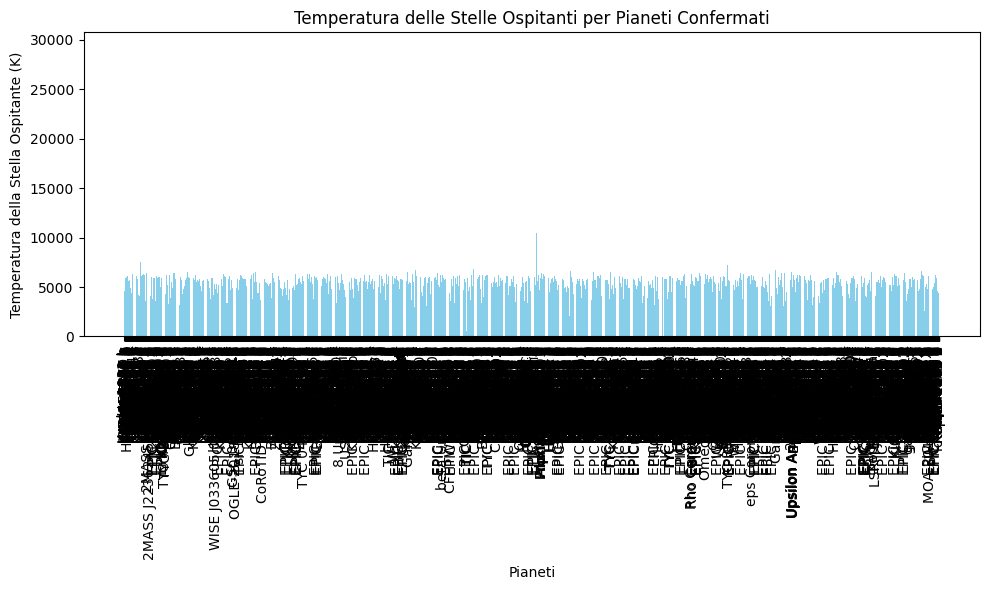

In [25]:
import matplotlib.pyplot as plt

# Crea un grafico a barre
plt.figure(figsize=(10, 6))
plt.bar(df_new['name'], df_new['hoststar_temperature'], color='skyblue')

# Aggiungi etichette e titolo
plt.xlabel('Pianeti')
plt.ylabel('Temperatura della Stella Ospitante (K)')
plt.title('Temperatura delle Stelle Ospitanti per Pianeti Confermati')

# Ruota i nomi dei pianeti per leggibilità, se sono molti
plt.xticks(rotation=90)

# Mostra il grafico
plt.tight_layout()  # Per evitare che le etichette si sovrappongano
plt.show()


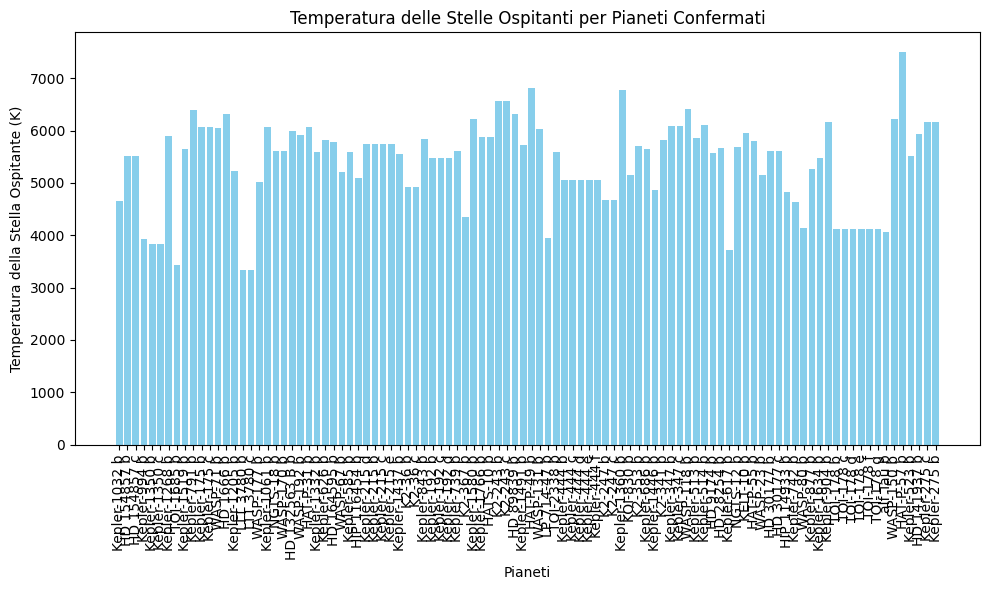

In [26]:
# Limita il DataFrame alle prime 100 righe con slicing
df_new = df_new[:100]

# Crea un grafico a barre
plt.figure(figsize=(10, 6))
plt.bar(df_new['name'], df_new['hoststar_temperature'], color='skyblue')

# Aggiungi etichette e titolo
plt.xlabel('Pianeti')
plt.ylabel('Temperatura della Stella Ospitante (K)')
plt.title('Temperatura delle Stelle Ospitanti per Pianeti Confermati')

# Ruota i nomi dei pianeti per leggibilità, se sono molti
plt.xticks(rotation=90)

# Mostra il grafico
plt.tight_layout()  # Per evitare che le etichette si sovrappongano
plt.show()

In [28]:
# Calcola il valore medio della temperatura delle stelle ospitanti
media_temperatura = df_new['hoststar_temperature'].mean()

# Stampa il valore medio
print(f'La temperatura media delle stelle ospitanti è: {media_temperatura:.2f} K')

La temperatura media delle stelle ospitanti è: 5389.59 K
